In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
updated = pd.read_csv('updated.csv')
first = pd.read_csv('first.csv')

# add a column for first impressions on the updated data
updated['FirstImpressions'] = first['Rating']

# export the updated data
updated.to_csv('combined.csv', index=False)

Now that we have our combined csv lets do some analysis

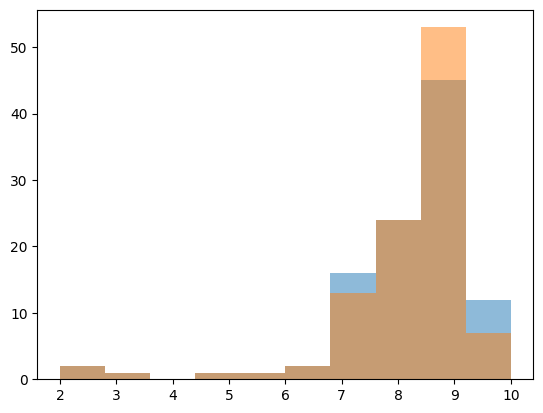

In [32]:
# Plot histogram of ratings

updatedHistogram = plt.hist(updated['Rating'], bins=10, alpha=0.5, label='Updated')
firstImpressionsHistogram = plt.hist(updated['FirstImpressions'], bins=10, alpha=0.5, label='First Impressions')


Updated ratings in blue, first impressions in orange. Ratings seem to be left skewed. Reason for this is likely that I only really listened to albums I knew I would enjoy to some degree. 

In [33]:
# Mean, Median, Mode, Ratings and First Impressions

updatedMean = np.mean(updated['Rating'])
updatedMedian = np.median(updated['Rating'])
updatedMode = updated['Rating'].mode()

firstImpressionsMean = np.mean(updated['FirstImpressions'])
firstImpressionsMedian = np.median(updated['FirstImpressions'])
firstImpressionsMode = updated['FirstImpressions'].mode()

print('Updated Data:')
print('Mean:', updatedMean)
print('Median:', updatedMedian)
print('Mode:', updatedMode)

print('')

print('First Impressions:')
print('Mean:', firstImpressionsMean)
print('Median:', firstImpressionsMedian)
print('Mode:', firstImpressionsMode)

Updated Data:
Mean: 8.149038461538462
Median: 8.5
Mode: 0    8.5
Name: Rating, dtype: float64

First Impressions:
Mean: 8.14423076923077
Median: 8.5
Mode: 0    8.5
Name: FirstImpressions, dtype: float64


Clearly, the 8.5 score is most common. Lets see what the scores look like seperated by artist.

In [65]:
# Create new datafframe with the number of albums mean and median ratings and first impressions per artist

dups = updated['Artist']
hmap = {}

for row in dups:
    if hmap.get(row) == None:
        hmap[row] = 1
    else:
        hmap[row] += 1

# convert hmap to pd dataframe
artists = list(hmap.keys())
artists

artistData = pd.DataFrame(columns=['Artist', 'Albums', 'MeanRating', 'MedianRating', 'MeanFirstImpressions', 'MedianFirstImpressions'])

for artist in artists:
    artistMeanRating = np.mean(updated[updated['Artist'] == artist]['Rating'])
    artistMedianRating = np.median(updated[updated['Artist'] == artist]['Rating'])

    artistMeanFirstImpressions = np.mean(updated[updated['Artist'] == artist]['FirstImpressions'])
    artistMedianFirstImpressions = np.median(updated[updated['Artist'] == artist]['FirstImpressions'])

    artistData = pd.concat([artistData, pd.DataFrame([{'Artist': artist, 'Albums':hmap[artist], 'MeanRating': artistMeanRating, 'MedianRating': artistMedianRating, 'MeanFirstImpressions': artistMeanFirstImpressions, 'MedianFirstImpressions': artistMedianFirstImpressions}])], ignore_index=True)

# sort by highest mean rating
artistData = artistData.sort_values(by='MeanRating', ascending=False)

# view the data
artistData.to_csv('artistData.csv', index=False)
artistData

/var/folders/d4/_v_lx6gx66z8htqrwxr89lvc0000gn/T/ipykernel_12752/793560942.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  artistData = pd.concat([artistData, pd.DataFrame([{'Artist': artist, 'Albums':hmap[artist], 'MeanRating': artistMeanRating, 'MedianRating': artistMedianRating, 'MeanFirstImpressions': artistMeanFirstImpressions, 'MedianFirstImpressions': artistMedianFirstImpressions}])], ignore_index=True)


,Artist,Albums,MeanRating,MedianRating,MeanFirstImpressions,MedianFirstImpressions
50,Killer Mike,1,10.000000,10.00,10.000000,10.00
53,Metallica,1,9.500000,9.50,9.500000,9.50
15,50 Cent,1,9.500000,9.50,9.500000,9.50
2,Common,3,9.166667,9.00,8.833333,9.00
28,MAVI,1,9.000000,9.00,9.000000,9.00
13,Lil Tecca,1,9.000000,9.00,8.500000,8.50
42,Slipknot,1,9.000000,9.00,9.000000,9.00
33,El-P,1,9.000000,9.00,9.000000,9.00
31,Denzel Curry,1,9.000000,9.00,9.000000,9.00
30,Injury Reserve,4,9.000000,9.00,8.875000,9.00


Here we have artists with only one album rating extremely high, so we should remove these outliers.

In [66]:
# remove outliers (artists with only one album)

artistDataNoOut = artistData[artistData['Albums'] > 1]
artistDataNoOut.to_csv('artistDataNoOutliers.csv', index=False)
artistDataNoOut

,Artist,Albums,MeanRating,MedianRating,MeanFirstImpressions,MedianFirstImpressions
2,Common,3,9.166667,9.00,8.833333,9.00
30,Injury Reserve,4,9.000000,9.00,8.875000,9.00
25,Mos Def,2,9.000000,9.00,8.750000,8.75
17,Lupe Fiasco,8,8.812500,8.75,8.750000,8.75
24,Jay-Z,2,8.750000,8.75,8.750000,8.75
48,billy woods,3,8.666667,8.50,8.666667,8.50
0,Nas,3,8.666667,8.50,8.500000,8.50
7,Outkast,4,8.500000,8.50,8.500000,8.50
11,Westside Gunn,2,8.500000,8.50,8.250000,8.25
5,IDK,5,8.500000,8.50,8.800000,8.50


Lets see on average how much each artists' mean ratings increased/decreased.

In [75]:
# find difference between mean rating and first impressions

artistData['Difference'] = artistData['MeanRating'] - artistData['MeanFirstImpressions']
artistData.to_csv('artistData.csv', index=False)

sorted = artistData.sort_values(by='Difference', ascending=False)

# remove difference = 0

sorted = sorted[sorted['Difference'] != 0]
sorted.to_csv('changedMeans.csv', index=False)

sorted

,Artist,Albums,MeanRating,MedianRating,MeanFirstImpressions,MedianFirstImpressions,Difference
19,Weezer,1,7.500000,7.50,7.000000,7.00,0.500000
13,Lil Tecca,1,9.000000,9.00,8.500000,8.50,0.500000
39,Ms. Lauryn Hill,1,8.500000,8.50,8.000000,8.00,0.500000
2,Common,3,9.166667,9.00,8.833333,9.00,0.333333
11,Westside Gunn,2,8.500000,8.50,8.250000,8.25,0.250000
25,Mos Def,2,9.000000,9.00,8.750000,8.75,0.250000
0,Nas,3,8.666667,8.50,8.500000,8.50,0.166667
30,Injury Reserve,4,9.000000,9.00,8.875000,9.00,0.125000
17,Lupe Fiasco,8,8.812500,8.75,8.750000,8.75,0.062500
10,JPEGMAFIA,5,8.000000,7.50,8.100000,8.00,-0.100000


The largest decrease was for IDK. The reason for this was that I had overrated the production on first listen, and thought the writing was a bit weak on some songs. For most of the other albums I had adjusted albums by half points depending on if they grew on me more or realized I didn't like it as much as I did at first. 